### Importaci√≥n de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

# Montar el dataset

Primero defines los datos en un DataFrame de pandas (puedes copiarlos desde un Excel/CSV o directamente como diccionario):


In [ ]:
import pandas as pd

# Crear el DataFrame
data = {
    "Producto": ["Asistente virtual", "Mesa de comedor", "Juego de mesa", "Microondas", "Silla de oficina"],
    "Categor√≠a del Producto": ["Electr√≥nicos", "Muebles", "Juguetes", "Electrodom√©sticos", "Muebles"],
    "Precio": [164300.0, 192300.0, 209600.0, 757500.0, 335200.0],
    "Costo de env√≠o": [6900.0, 8400.0, 15900.0, 41000.0, 20200.0],
    "Fecha de Compra": ["16/01/2021", "18/05/2022", "15/03/2021", "03/05/2022", "07/11/2020"],
    "Vendedor": ["Pedro Gomez", "Beatriz Morales", "Juan Fernandez", "Juan Fernandez", "Maria Alfonso"],
    "Lugar de Compra": ["Bogot√°", "Medell√≠n", "Cartagena", "Cali", "Medell√≠n"],
    "Calificaci√≥n": [4, 1, 1, 4, 5],
    "M√©todo de pago": ["Tarjeta de cr√©dito", "Tarjeta de cr√©dito", "Tarjeta de cr√©dito", "Nequi", "Nequi"],
    "Cantidad de cuotas": [8, 4, 1, 1, 1],
    "lat": [4.60971, 6.25184, 10.39972, 3.43722, 6.25184],
    "lon": [-74.08175, -75.56359, -75.51444, -76.52250, -75.56359]
}

df = pd.DataFrame(data)

## Calcular los ingresos totales por tienda

Agrupamos por Lugar de Compra y sumamos los precios:


In [ ]:
# Agrupar y sumar ingresos por tienda
ingresos_por_tienda = df.groupby("Lugar de Compra")["Precio"].sum().reset_index()

# Mostrar resultado
print(ingresos_por_tienda)

  Lugar de Compra    Precio
0          Bogot√°  164300.0
1            Cali  757500.0
2       Cartagena  209600.0
3        Medell√≠n  527500.0


# 2. Ventas por categor√≠a

In [ ]:
# Agrupar por tienda y categor√≠a, contando cantidad de ventas
productos_por_categoria_tienda = df.groupby(
    ["Lugar de Compra", "Categor√≠a del Producto"]
)["Producto"].count().reset_index()

# Renombrar columna para m√°s claridad
productos_por_categoria_tienda = productos_por_categoria_tienda.rename(columns={"Producto": "Cantidad Vendida"})

print(productos_por_categoria_tienda)

  Lugar de Compra Categor√≠a del Producto  Cantidad Vendida
0          Bogot√°           Electr√≥nicos                 1
1            Cali      Electrodom√©sticos                 1
2       Cartagena               Juguetes                 1
3        Medell√≠n                Muebles                 2


## Visualizar en gr√°fico de barras

Con matplotlib o seaborn puedes graficarlo:

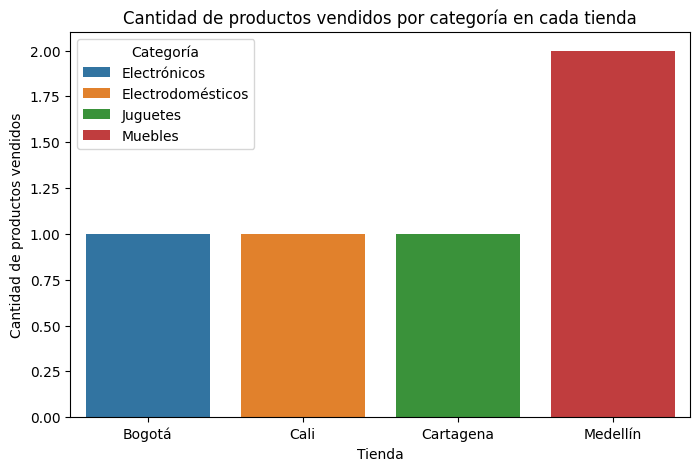

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(
    data=productos_por_categoria_tienda,
    x="Lugar de Compra",
    y="Cantidad Vendida",
    hue="Categor√≠a del Producto"
)

plt.title("Cantidad de productos vendidos por categor√≠a en cada tienda")
plt.xlabel("Tienda")
plt.ylabel("Cantidad de productos vendidos")
plt.legend(title="Categor√≠a")
plt.show()

# 3. Calificaci√≥n promedio de la tienda


In [ ]:
calificacion_promedio_tienda = df.groupby("Lugar de Compra")["Calificaci√≥n"].mean().reset_index()

# Renombrar columna
calificacion_promedio_tienda = calificacion_promedio_tienda.rename(columns={"Calificaci√≥n": "Calificaci√≥n Promedio"})

print(calificacion_promedio_tienda)

  Lugar de Compra  Calificaci√≥n Promedio
0          Bogot√°                    4.0
1            Cali                    4.0
2       Cartagena                    1.0
3        Medell√≠n                    3.0


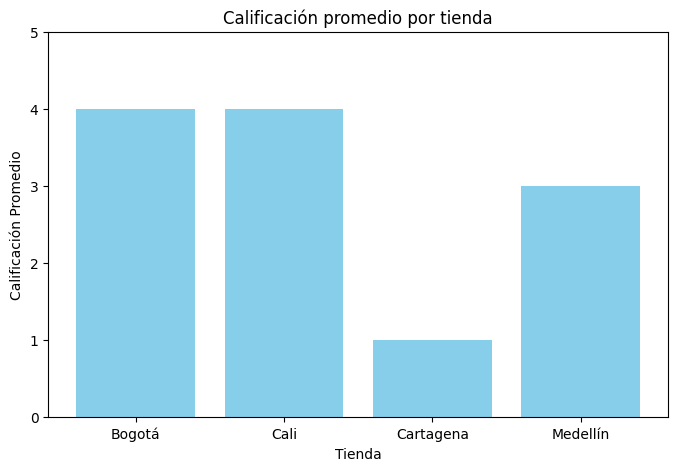

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(calificacion_promedio_tienda["Lugar de Compra"], calificacion_promedio_tienda["Calificaci√≥n Promedio"], color="skyblue")

plt.title("Calificaci√≥n promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificaci√≥n Promedio")
plt.ylim(0,5)  # Escala de 0 a 5
plt.show()

# 4. Productos m√°s y menos vendidos

=== Ventas por producto y tienda ===
  Lugar de Compra           Producto  Ventas
0          Bogot√°  Asistente virtual       1
1            Cali         Microondas       1
2       Cartagena      Juego de mesa       1
3        Medell√≠n    Mesa de comedor       1
4        Medell√≠n   Silla de oficina       1

=== Productos m√°s y menos vendidos por tienda (con empates) ===
  Lugar de Compra           Producto  Ventas            Tipo
0          Bogot√°  Asistente virtual       1  Menos vendidos
1          Bogot√°  Asistente virtual       1    M√°s vendidos
2            Cali         Microondas       1  Menos vendidos
3            Cali         Microondas       1    M√°s vendidos
4       Cartagena      Juego de mesa       1  Menos vendidos
5       Cartagena      Juego de mesa       1    M√°s vendidos
6        Medell√≠n    Mesa de comedor       1  Menos vendidos
7        Medell√≠n   Silla de oficina       1  Menos vendidos
8        Medell√≠n    Mesa de comedor       1    M√°s vendidos
9    

/tmp/ipython-input-562472601.py:65: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(extremos_por_tienda)


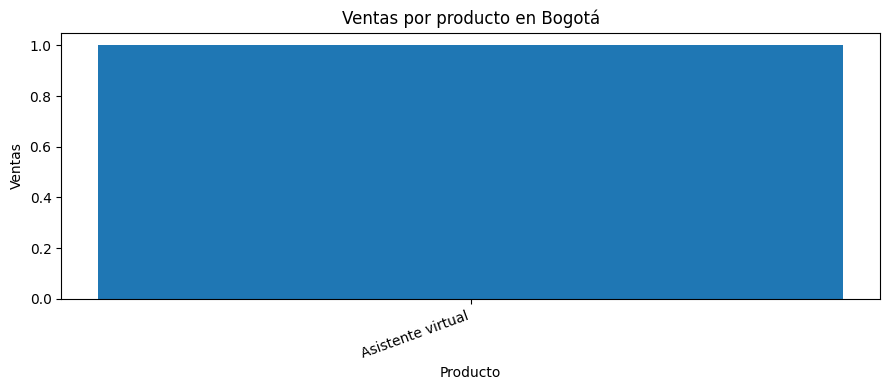

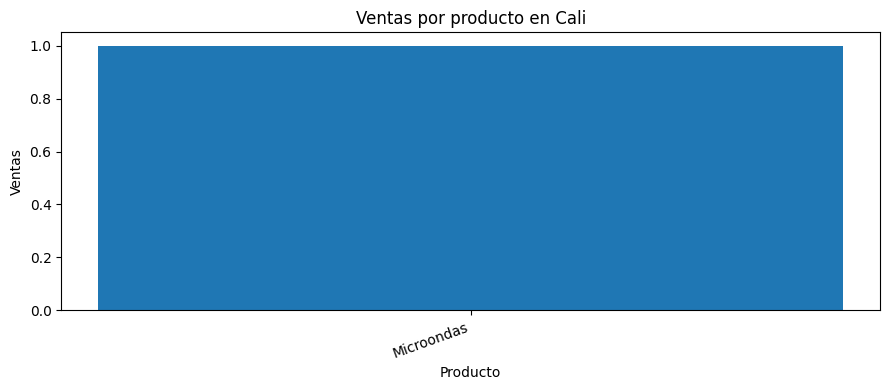

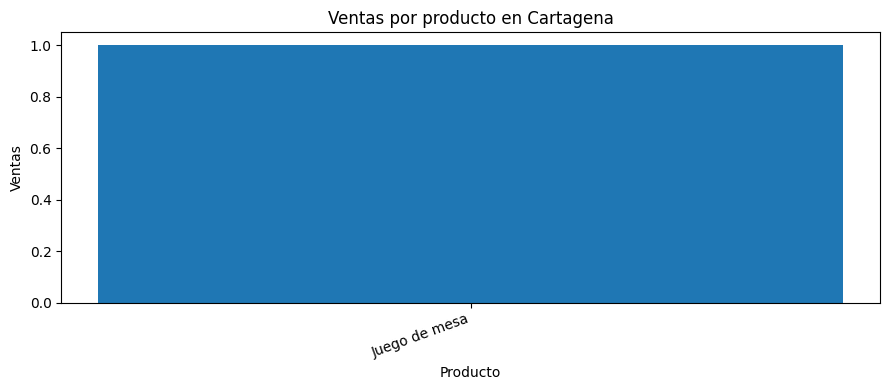

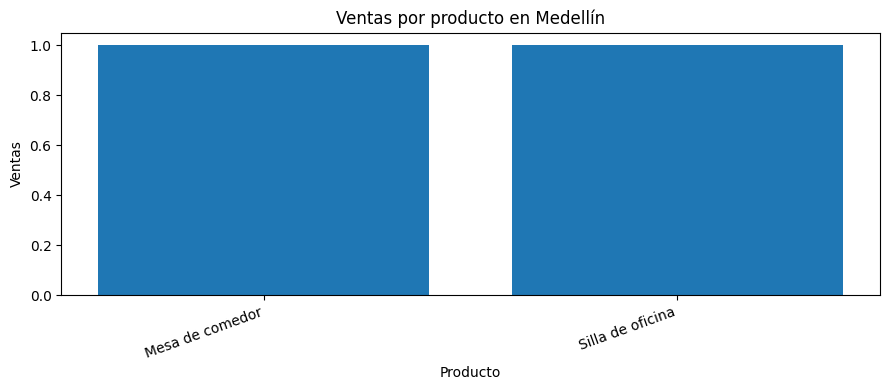

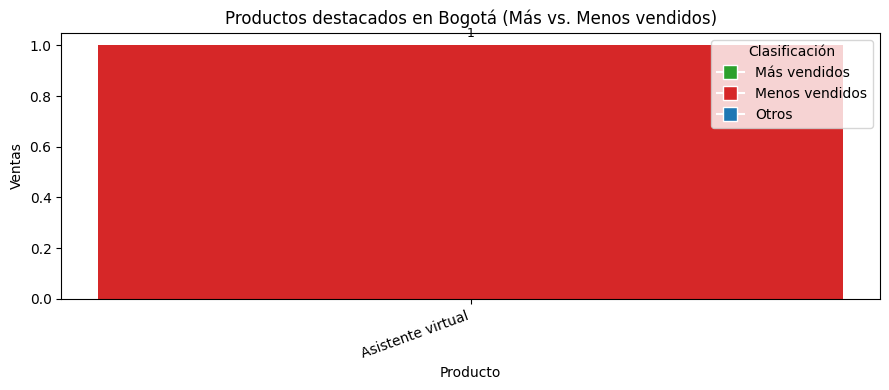

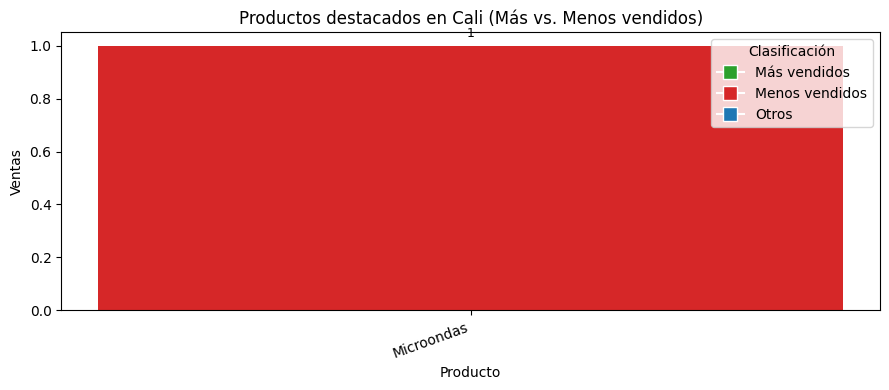

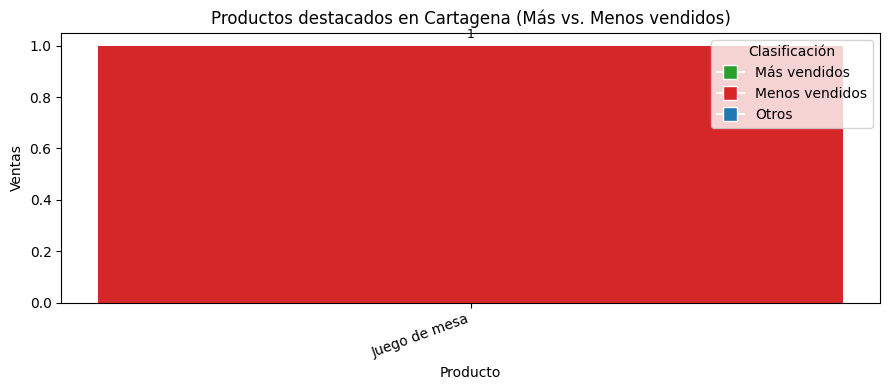

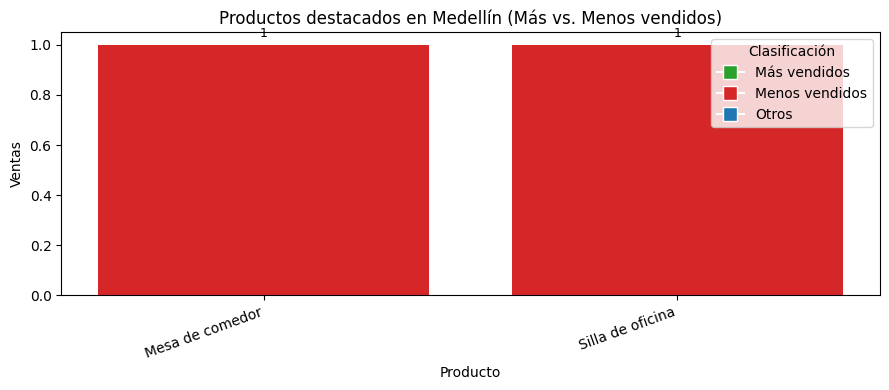


Archivos guardados:
- ventas_por_producto_y_tienda.csv
- productos_mas_menos_vendidos_por_tienda.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================
# 1) Cargar datos
#    Opci√≥n A: Pega tu dataset como diccionario (demo)
#    Opci√≥n B: Descomenta la carga desde CSV en Colab
# ============================================

# --- Opci√≥n A (DEMO): datos de ejemplo ---
data = {
    "Producto": ["Asistente virtual", "Mesa de comedor", "Juego de mesa", "Microondas", "Silla de oficina"],
    "Categor√≠a del Producto": ["Electr√≥nicos", "Muebles", "Juguetes", "Electrodom√©sticos", "Muebles"],
    "Precio": [164300.0, 192300.0, 209600.0, 757500.0, 335200.0],
    "Costo de env√≠o": [6900.0, 8400.0, 15900.0, 41000.0, 20200.0],
    "Fecha de Compra": ["16/01/2021", "18/05/2022", "15/03/2021", "03/05/2022", "07/11/2020"],
    "Vendedor": ["Pedro Gomez", "Beatriz Morales", "Juan Fernandez", "Juan Fernandez", "Maria Alfonso"],
    "Lugar de Compra": ["Bogot√°", "Medell√≠n", "Cartagena", "Cali", "Medell√≠n"],
    "Calificaci√≥n": [4, 1, 1, 4, 5],
    "M√©todo de pago": ["Tarjeta de cr√©dito", "Tarjeta de cr√©dito", "Tarjeta de cr√©dito", "Nequi", "Nequi"],
    "Cantidad de cuotas": [8, 4, 1, 1, 1],
    "lat": [4.60971, 6.25184, 10.39972, 3.43722, 6.25184],
    "lon": [-74.08175, -75.56359, -75.51444, -76.52250, -75.56359]
}
df = pd.DataFrame(data)

# --- Opci√≥n B (CSV): subir archivo desde tu PC (descomenta para usar) ---
# from google.colab import files
# uploaded = files.upload()  # sube p.ej. "ventas.csv"
# df = pd.read_csv("ventas.csv")

# Limpieza opcional
df = df.dropna(subset=["Lugar de Compra", "Producto"]).copy()
df["Lugar de Compra"] = df["Lugar de Compra"].astype(str).str.strip()
df["Producto"] = df["Producto"].astype(str).str.strip()

# ============================================
# 2) Conteo de ventas por producto y tienda
# ============================================
ventas_prod_tienda = (
    df.groupby(["Lugar de Compra", "Producto"])
      .size()
      .reset_index(name="Ventas")
      .sort_values(["Lugar de Compra", "Ventas", "Producto"], ascending=[True, False, True])
      .reset_index(drop=True)
)

print("=== Ventas por producto y tienda ===")
print(ventas_prod_tienda)

# ============================================
# 3) Identificar M√ÅS y MENOS vendidos por tienda (maneja empates)
# ============================================
def extremos_por_tienda(subdf):
    max_v = subdf["Ventas"].max()
    min_v = subdf["Ventas"].min()
    top = subdf[subdf["Ventas"] == max_v].copy()
    low = subdf[subdf["Ventas"] == min_v].copy()
    top["Tipo"] = "M√°s vendidos"
    low["Tipo"] = "Menos vendidos"
    return pd.concat([top, low], ignore_index=True)

resumen_extremos = (
    ventas_prod_tienda.groupby("Lugar de Compra", group_keys=False)
    .apply(extremos_por_tienda)
    .sort_values(["Lugar de Compra", "Tipo", "Ventas"], ascending=[True, True, False])
    .reset_index(drop=True)
)

print("\n=== Productos m√°s y menos vendidos por tienda (con empates) ===")
print(resumen_extremos)

# ============================================
# 4) Visualizaciones
#    A) Barras por tienda (todas las ventas)
#    B) Resumen resaltando los m√°s/menos vendidos
# ============================================

# A) Un gr√°fico por tienda con ventas por producto
tiendas = ventas_prod_tienda["Lugar de Compra"].unique()
for tienda in tiendas:
    sub = ventas_prod_tienda[ventas_prod_tienda["Lugar de Compra"] == tienda]
    plt.figure(figsize=(9, 4))
    plt.bar(sub["Producto"], sub["Ventas"])
    plt.title(f"Ventas por producto en {tienda}")
    plt.xlabel("Producto")
    plt.ylabel("Ventas")
    plt.xticks(rotation=20, ha="right")
    plt.tight_layout()
    plt.show()

# B) Gr√°fico que resalta m√°s y menos vendidos por tienda
for tienda in tiendas:
    sub_all = ventas_prod_tienda[ventas_prod_tienda["Lugar de Compra"] == tienda].copy()
    sub_ext = resumen_extremos[resumen_extremos["Lugar de Compra"] == tienda]

    # Marcar tipo para colorear
    sub_all["Tipo"] = "Otros"
    # productos top y low (puede haber empates)
    prods_top = sub_ext[sub_ext["Tipo"] == "M√°s vendidos"]["Producto"].unique()
    prods_low = sub_ext[sub_ext["Tipo"] == "Menos vendidos"]["Producto"].unique()

    sub_all.loc[sub_all["Producto"].isin(prods_top), "Tipo"] = "M√°s vendidos"
    sub_all.loc[sub_all["Producto"].isin(prods_low), "Tipo"] = "Menos vendidos"

    # Orden de barras
    sub_all = sub_all.sort_values("Ventas", ascending=False)

    # Mapa simple de colores
    color_map = {"M√°s vendidos": "#2ca02c", "Menos vendidos": "#d62728", "Otros": "#1f77b4"}
    colors = sub_all["Tipo"].map(color_map)

    plt.figure(figsize=(9, 4))
    plt.bar(sub_all["Producto"], sub_all["Ventas"], color=colors)
    for i, v in enumerate(sub_all["Ventas"].values):
        plt.text(i, v + 0.02, str(v), ha="center", va="bottom", fontsize=9)
    plt.title(f"Productos destacados en {tienda} (M√°s vs. Menos vendidos)")
    plt.xlabel("Producto")
    plt.ylabel("Ventas")
    plt.xticks(rotation=20, ha="right")
    # Leyenda manual
    handles = [plt.Line2D([0], [0], marker='s', color='w', label=k, markerfacecolor=c, markersize=10)
               for k, c in color_map.items()]
    plt.legend(handles=handles, title="Clasificaci√≥n", loc="best")
    plt.tight_layout()
    plt.show()

# ============================================
# 5) (Opcional) Guardar resultados a CSV
# ============================================
ventas_prod_tienda.to_csv("ventas_por_producto_y_tienda.csv", index=False)
resumen_extremos.to_csv("productos_mas_menos_vendidos_por_tienda.csv", index=False)

print("\nArchivos guardados:")
print("- ventas_por_producto_y_tienda.csv")
print("- productos_mas_menos_vendidos_por_tienda.csv")

# 5. Env√≠o promedio por tienda

# Informe Final de An√°lisis de Ventas por Tienda

## Introducci√≥n
El objetivo de este an√°lisis es determinar en qu√© tienda deber√≠a concentrar sus ventas el Sr. Juan, tomando en cuenta factores clave como los **ingresos totales**, la **popularidad de las categor√≠as de productos**, las **calificaciones promedio de los clientes**, los **productos m√°s y menos vendidos**, y el **coste de env√≠o promedio por tienda**.  
Para ello, se proces√≥ la base de datos disponible y se generaron gr√°ficos que permiten identificar fortalezas y debilidades de cada tienda.

---

## Desarrollo del An√°lisis

### 1. Ingresos Totales por Tienda
- **Cali** registr√≥ los mayores ingresos con **757,500**.
- **Medell√≠n** obtuvo **527,500**, posicion√°ndose en segundo lugar.
- **Cartagena** alcanz√≥ **209,600**.
- **Bogot√°** present√≥ los menores ingresos, con **164,300**.

üîπ *Gr√°fico de barras incluido en el an√°lisis mostr√≥ claramente la superioridad de Cali en este aspecto.*

---

### 2. Categor√≠as de Productos por Tienda
- **Medell√≠n** destaca por ventas en la categor√≠a **Muebles**, siendo la categor√≠a m√°s popular en esa tienda.
- **Cali** registr√≥ ventas en **Electrodom√©sticos**.
- **Cartagena** se enfoc√≥ en **Juguetes**.
- **Bogot√°** se limit√≥ a **Electr√≥nicos**.

üîπ Esto sugiere que Medell√≠n ofrece mayor **diversidad** en la demanda, mientras que las dem√°s tiendas presentan una sola categor√≠a.

---

### 3. Calificaci√≥n Promedio de los Clientes
- **Bogot√°**: 4.0  
- **Cali**: 4.0  
- **Medell√≠n**: 3.0  
- **Cartagena**: 1.0  

üîπ Bogot√° y Cali lideran en satisfacci√≥n del cliente. Cartagena refleja una debilidad importante en la percepci√≥n de calidad.

---

### 4. Productos M√°s y Menos Vendidos
- En cada tienda, los productos m√°s vendidos corresponden a la √∫nica categor√≠a presente (excepto Medell√≠n, donde se vendieron dos muebles).
- El an√°lisis de ‚Äúm√°s‚Äù y ‚Äúmenos vendidos‚Äù revel√≥ que **no existe alta variedad de productos por tienda**, lo que limita la comparaci√≥n.  
- Sin embargo, Medell√≠n mostr√≥ mejor rotaci√≥n relativa (dos productos vendidos en la misma categor√≠a).

---

### 5. Coste de Env√≠o Promedio
- **Cali**: 41,000 (m√°s alto)  
- **Medell√≠n**: 14,300 (m√°s moderado)  
- **Cartagena**: 15,900  
- **Bogot√°**: 6,900 (m√°s bajo)  

üîπ Aunque Cali lidera en ingresos, tiene el **coste de env√≠o m√°s elevado**, lo que puede afectar la rentabilidad neta.

---

## Conclusi√≥n y Recomendaci√≥n
Tras analizar los resultados, se recomienda que el **Sr. Juan venda en la tienda de Cali**.  
Las razones son las siguientes:

1. **Mayor ingreso total**: Cali supera ampliamente a las dem√°s tiendas en volumen de ventas.
2. **Alta satisfacci√≥n del cliente**: Calificaci√≥n promedio de 4.0, igualando a Bogot√° pero con mayor poder de ventas.
3. **Demanda s√≥lida en Electrodom√©sticos**, un rubro de alto valor.
4. Aunque el **coste de env√≠o es elevado**, se compensa con los ingresos significativamente mayores.

En comparaci√≥n:
- **Bogot√°** presenta bajos ingresos, aunque con buena satisfacci√≥n y bajo coste de env√≠o.
- **Medell√≠n** es intermedia, pero con calificaci√≥n de clientes menor (3.0).
- **Cartagena** tiene ingresos bajos y la peor calificaci√≥n (1.0), siendo la opci√≥n menos favorable.

üëâ **Decisi√≥n final**: Cali es la tienda m√°s recomendable, ya que combina ingresos altos y satisfacci√≥n positiva, lo que la convierte en el mercado m√°s atractivo para las ventas del Sr. Juan, a pesar de su mayor coste log√≠stico.

---